# Spearman Correlation for Feature Selection

In [19]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

season_22_23 = pd.read_csv('2022-23_data.csv')
season_23_24 = pd.read_csv('2023-24_data.csv')

## Calcuating Correlation Matrix For the 2 Seasons

In [63]:
# Drop non-numeric columns
numeric_22_df = season_22_23.select_dtypes(include='number')
numeric_23_df = season_23_24.select_dtypes(include='number')

# Drop rows with missing values 
numeric_22_df = numeric_22_df.dropna()
numeric_23_df = numeric_23_df.dropna()

spearman_corr_22 = numeric_22_df.corr(method='spearman')['PTS'].sort_values(ascending=False)
spearman_corr_23 = numeric_23_df.corr(method='spearman')['PTS'].sort_values(ascending=False)

# Dropping features
spearman_corr_22 = spearman_corr_22.drop('PTS')
spearman_corr_23 = spearman_corr_23.drop('PTS')

spearman_corr_22 = spearman_corr_22.drop('WON')
spearman_corr_23 = spearman_corr_23.drop('WON')

In [64]:
positive_count = spearman_corr_22[spearman_corr_22 > 0].count()
negative_count = spearman_corr_22[spearman_corr_22 < 0].count()

print(f"Number of positively correlated features: {positive_count}")
print(f"Number of negatively correlated features: {negative_count}")


Number of positively correlated features: 234
Number of negatively correlated features: 59


In [65]:
spearman_corr_22.head(15)

fieldGoalPercentage_my_player_1                0.307206
uncontestedFieldGoalsPercentage_my_player_1    0.238421
fieldGoalPercentage_my_player_4                0.234839
fieldGoalPercentage_my_player_3                0.228825
fieldGoalPercentage_my_player_2                0.227115
uncontestedFieldGoalsMade_my_player_1          0.218968
fieldGoalPercentage_my_player_6                0.204272
fieldGoalPercentage_my_player_5                0.199658
uncontestedFieldGoalsPercentage_my_player_2    0.199376
uncontestedFieldGoalsPercentage_my_player_6    0.190136
uncontestedFieldGoalsPercentage_my_player_3    0.187681
uncontestedFieldGoalsPercentage_my_player_4    0.185344
fieldGoalPercentage_my_player_7                0.183429
uncontestedFieldGoalsMade_my_player_6          0.177936
uncontestedFieldGoalsMade_my_player_2          0.173492
Name: PTS, dtype: float64

In [66]:
spearman_corr_22 = spearman_corr_22.drop('Distance')

In [67]:
spearman_corr_22.tail(15)

reboundChancesTotal_my_player_5         -0.042105
secondaryAssists_opposing_player_2      -0.048151
reboundChancesTotal_opposing_player_6   -0.055351
secondaryAssists_opposing_player_3      -0.055963
reboundChancesOffensive_my_player_5     -0.056931
assists_opposing_player_1               -0.057863
reboundChancesTotal_opposing_player_4   -0.063624
reboundChancesOffensive_my_player_2     -0.064644
secondaryAssists_opposing_player_7      -0.067581
reboundChancesTotal_opposing_player_7   -0.068762
reboundChancesTotal_opposing_player_1   -0.076876
reboundChancesTotal_opposing_player_5   -0.087236
reboundChancesTotal_opposing_player_3   -0.096377
OPPONENT_WIN_PCT                        -0.113229
reboundChancesTotal_opposing_player_2   -0.121107
Name: PTS, dtype: float64

In [68]:
spearman_corr_23.head(15)

fieldGoalPercentage_my_player_1                0.288288
fieldGoalPercentage_my_player_2                0.282299
fieldGoalPercentage_my_player_4                0.274839
fieldGoalPercentage_my_player_3                0.271004
uncontestedFieldGoalsPercentage_my_player_1    0.264905
uncontestedFieldGoalsPercentage_my_player_2    0.241883
uncontestedFieldGoalsMade_my_player_1          0.231813
uncontestedFieldGoalsMade_my_player_3          0.224305
uncontestedFieldGoalsPercentage_my_player_4    0.219640
uncontestedFieldGoalsPercentage_my_player_3    0.219226
assists_my_player_1                            0.212510
fieldGoalPercentage_my_player_6                0.212303
uncontestedFieldGoalsMade_my_player_2          0.202850
uncontestedFieldGoalsMade_my_player_4          0.197810
fieldGoalPercentage_my_player_5                0.187473
Name: PTS, dtype: float64

In [61]:
spearman_corr_23 = spearman_corr_23.drop('TEAM_ID')

In [69]:
spearman_corr_23.tail(15)

personId_my_player_4                    -0.063781
reboundChancesTotal_opposing_player_4   -0.064253
reboundChancesTotal_opposing_player_7   -0.067628
REST_DAYS                               -0.069276
personId_my_player_6                    -0.084425
reboundChancesOffensive_my_player_1     -0.088039
reboundChancesTotal_opposing_player_5   -0.090088
personId_my_player_2                    -0.112500
personId_my_player_3                    -0.117529
reboundChancesTotal_opposing_player_1   -0.123827
teamId                                  -0.125150
TEAM_ID                                 -0.125150
personId_my_player_1                    -0.127146
reboundChancesTotal_opposing_player_2   -0.128825
OPPONENT_WIN_PCT                        -0.162450
Name: PTS, dtype: float64

### Correlation with PTS

### Top 15 and bottom 15 Features for Each Season that Correlates with Team Point Totals

In [87]:
def combine_and_include_features(top_positive, top_negative, additional_features):
    """
    Combine top positive and negative correlations, and ensure additional features are included.
    
    Parameters:
        top_positive (pd.Series): Top positively correlated features with their correlations.
        top_negative (pd.Series): Top negatively correlated features with their correlations.
        additional_features (list): List of additional features to include.

    Returns:
        pd.DataFrame: A DataFrame containing features and their correlations.
    """
    # Combine top positive and negative correlations
    combined_features = pd.concat([top_positive, top_negative])

    # Convert to DataFrame for easier manipulation
    features_df = pd.DataFrame({
        'Feature': combined_features.index.tolist(),
        'Spearman_Correlation': combined_features.values
    })

    # Add additional features with a default correlation of 0 if not already included
    for feature in additional_features:
        if feature not in features_df['Feature'].values:
            features_df = pd.concat(
                [features_df, pd.DataFrame({'Feature': [feature], 'Spearman_Correlation': [0]})],
                ignore_index=True
            )
    
    # Optional: Sort the features alphabetically or by correlation value
    features_df = features_df.sort_values(by='Spearman_Correlation', ascending=False).reset_index(drop=True)
    
    return features_df


In [88]:
# Take top 15 and bottom 15 for 2022-23 season
top_positive_22 = spearman_corr_22[spearman_corr_22 > 0].head(15)
top_negative_22 = spearman_corr_22[spearman_corr_22 < 0].tail(15)

# Repeat for 2023-24 season
top_positive_23 = spearman_corr_23[spearman_corr_23 > 0].head(15)
top_negative_23 = spearman_corr_23[spearman_corr_23 < 0].tail(15)

# Desired features to ensure inclusion
additional_features = ['REF_BIAS', 'CLOSE_WIN_PCT', 'REST_DAYS', 'IS_BACK_TO_BACK', 'DISTANCE', 'RECENT_WIN_PCT']

# Combine features and include additional ones for 2022-23 season
features_22_df = combine_and_include_features(top_positive_22, top_negative_22, additional_features)

# Combine features and include additional ones for 2023-24 season
features_23_df = combine_and_include_features(top_positive_23, top_negative_23, additional_features)


In [89]:
print(features_22_df)

                                        Feature  Spearman_Correlation
0               fieldGoalPercentage_my_player_1              0.307206
1   uncontestedFieldGoalsPercentage_my_player_1              0.238421
2               fieldGoalPercentage_my_player_4              0.234839
3               fieldGoalPercentage_my_player_3              0.228825
4               fieldGoalPercentage_my_player_2              0.227115
5         uncontestedFieldGoalsMade_my_player_1              0.218968
6               fieldGoalPercentage_my_player_6              0.204272
7               fieldGoalPercentage_my_player_5              0.199658
8   uncontestedFieldGoalsPercentage_my_player_2              0.199376
9   uncontestedFieldGoalsPercentage_my_player_6              0.190136
10  uncontestedFieldGoalsPercentage_my_player_3              0.187681
11  uncontestedFieldGoalsPercentage_my_player_4              0.185344
12              fieldGoalPercentage_my_player_7              0.183429
13        unconteste

#### 2022-2023 Season

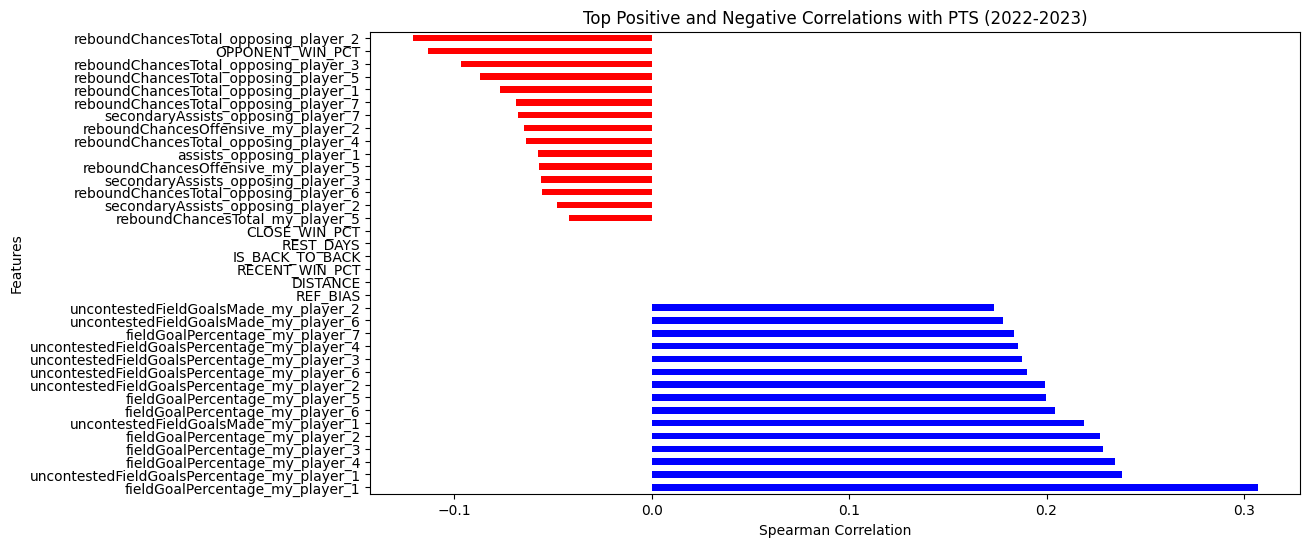

In [92]:
plt.figure(figsize=(12, 6))
colors = ['red' if value < 0 else 'blue' for value in features_22_df['Spearman_Correlation']]
features_22_df.set_index('Feature')['Spearman_Correlation'].plot(kind='barh', color=colors)
plt.title('Top Positive and Negative Correlations with PTS (2022-2023)')
plt.xlabel('Spearman Correlation')
plt.ylabel('Features')
plt.show()


### 2023-2024 Season

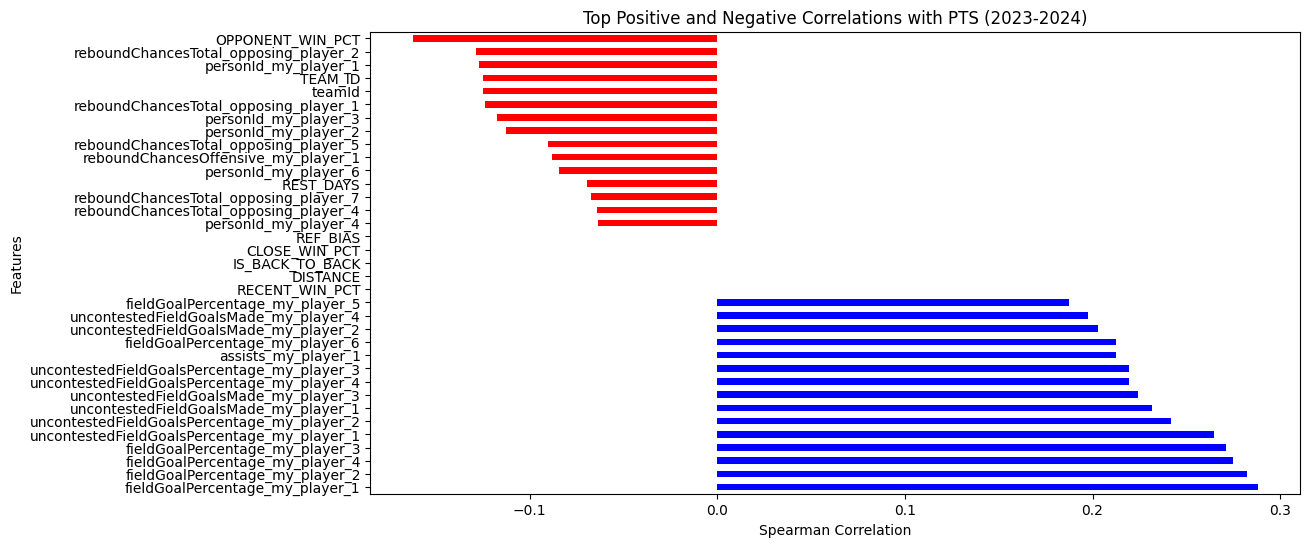

In [93]:
plt.figure(figsize=(12, 6))
colors = ['red' if value < 0 else 'blue' for value in features_23_df['Spearman_Correlation']]
features_23_df.set_index('Feature')['Spearman_Correlation'].plot(kind='barh', color=colors)
plt.title('Top Positive and Negative Correlations with PTS (2023-2024)')
plt.xlabel('Spearman Correlation')
plt.ylabel('Features')
plt.show()

In [95]:
# Combine the DFs
combined_df = pd.concat([numeric_22_df, numeric_23_df], ignore_index=True)

combined_df = combined_df.drop_duplicates()

combined_df = combined_df.reset_index(drop=True)